## Risk Return Analysis and Portfolio Diversification Recommendations

### Import the Data

In [18]:
# Import Pandas library
import pandas as pd

# Import Path from Pathlib library
from pathlib import Path

# Import the NumPy library
import numpy as np

# Import matplotlib
%matplotlib inline

In [3]:
whales_df = pd.read_csv(
    Path('Resources/whale_navs.csv'), 
    index_col='date', 
    parse_dates=True, 
    infer_datetime_format=True
)

display(whales_df.head())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Daily Returns based on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. 

In [19]:
# Clean up the data
whales_returns = whales_df.pct_change().dropna()
display(whales_df.head())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. 

###  Performance Analysis

Do any of the portfolios outperform the broader stock market, which the S&P 500 represents?

<AxesSubplot:title={'center':'Daily Return Values Plotted'}, xlabel='Date', ylabel='Return Value'>

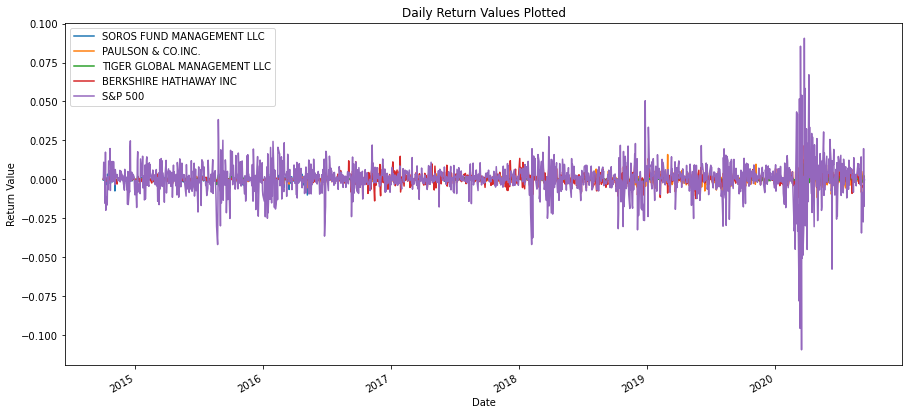

In [20]:
# Plot the daily return data of the 4 funds and the S&P 500 
whales_returns.plot(
    figsize=(15,7), 
    title='Daily Return Values Plotted',
    ylabel='Return Value',
    xlabel='Date'
)

In [21]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500

cumulative_returns = (1 + whales_returns).cumprod()
cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


<AxesSubplot:title={'center':'Cumulative Daily Return Values Plotted'}, xlabel='Date', ylabel='Return Value'>

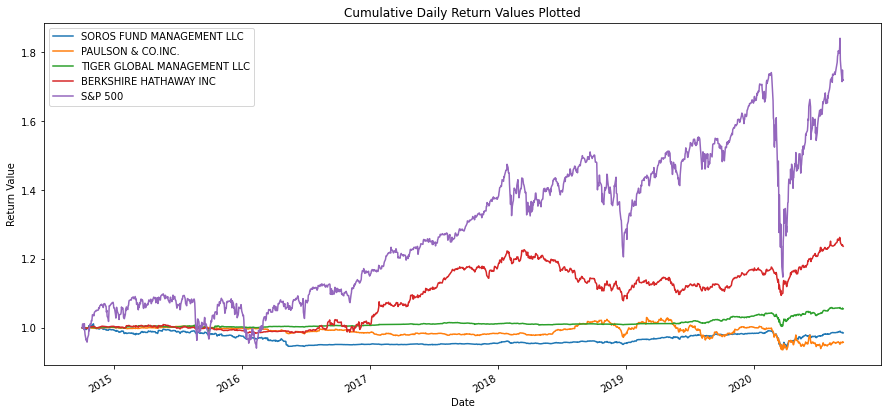

In [22]:
# Visualize the cumulative returns
cumulative_returns.plot(
    figsize=(15,7), 
    title='Cumulative Daily Return Values Plotted',
    ylabel='Return Value',
    xlabel='Date'
)

**Quantitative Analysis** 
Based on the cumulative return data and the visualization, In late 2015 and early 2016 all four whale funds outperformed the S & P 500

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

<AxesSubplot:title={'center':'Daily Return Values Plotted'}>

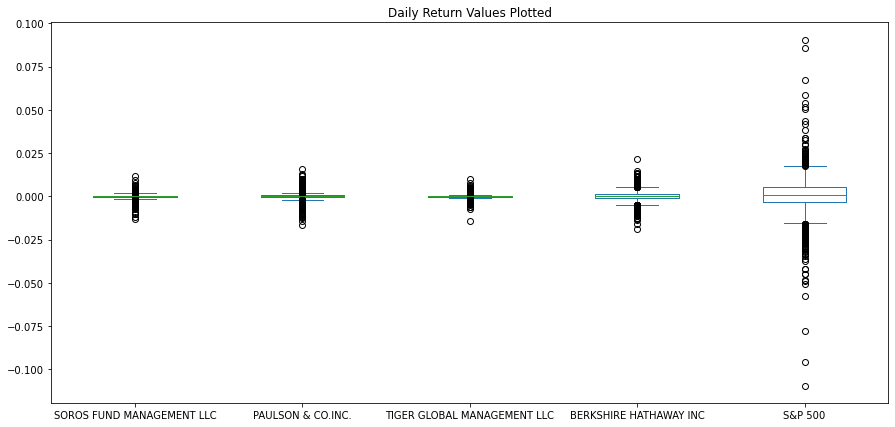

In [23]:
# Box plots to visualize the volatility of the 4 funds and the S&P 500 

whales_returns.plot(
    kind='box',
    figsize=(15,7), 
    title='Daily Return Values Plotted'
)

<AxesSubplot:title={'center':'Daily Return Values Plotted'}>

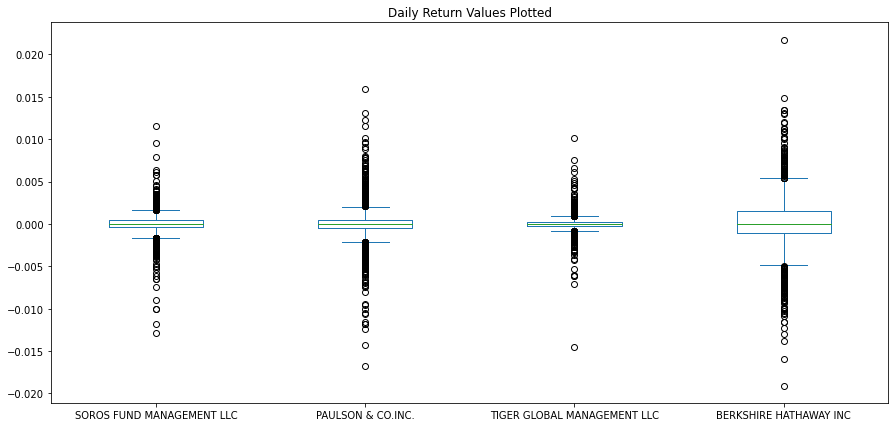

In [25]:
# Drop the S&P 500 column from the DataFrame for a more robust analysis
whales_alone_df = whales_returns.drop(columns='S&P 500')

whales_alone_df.plot(
    kind='box',
    figsize=(15,7), 
    title='Daily Return Values Plotted'
)

**Quantitative Analysis** Based on the box plot, Berkshire Hathaway was the most volatile fund portfolio while Tiger Global Management LLC had the smallest spread and was the least volatile.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

In [27]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
whales_returns_std = whales_returns.std().sort_values()
display(whales_returns_std)

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [28]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
annual_standard_deviation = whales_returns_std * np.sqrt(252)
annual_standard_deviation.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'Whale Funds (w/S&P) Standard Deviation 21-day Rolling Window'}, xlabel='Date'>

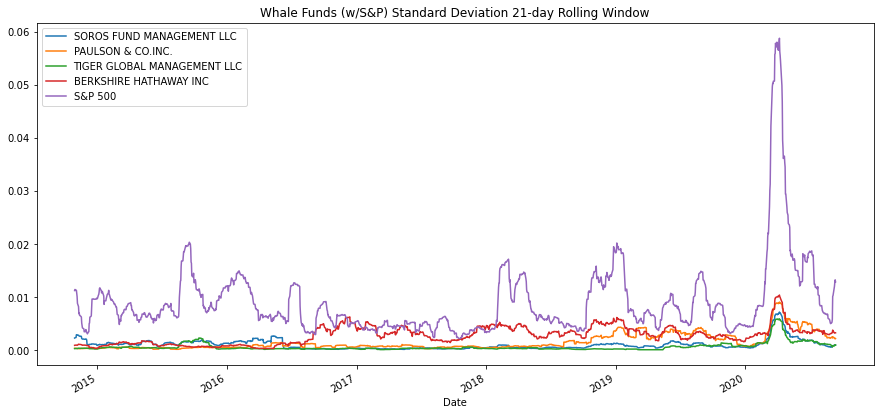

In [29]:
# Plot the rolling standard deviation of the 4 portfolios and the S&P 500 with a 21-day rolling window
whales_returns_21 = whales_returns.rolling(window=21).std()
whales_returns_21.plot(
    figsize=(15,7),
    title='Whale Funds (w/S&P) Standard Deviation 21-day Rolling Window',
    xlabel='Date'    
)

<AxesSubplot:title={'center':'Whale Funds Standard Deviation 21-day Rolling Window'}, xlabel='Date'>

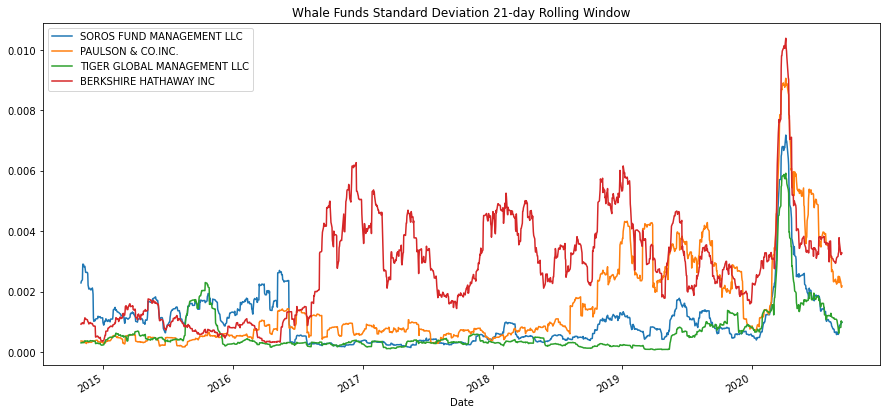

In [30]:
# Plot the rolling standard deviation of just the 4 portfolios with a 21-day rolling window 

whales_alone_21 = whales_alone_df.rolling(window=21).std()
whales_alone_21.plot(
    figsize=(15,7),
    title='Whale Funds Standard Deviation 21-day Rolling Window',
    xlabel='Date'    
)


**Quantitative Analysis** Based on the annualized standard deviation, there were no portfolios among the four whale funds presented that posed more risk than the S&P 500

**Quantitative Analysis** Based on the rolling metrics, the risk of each portfolio remains relativily steady with slight increases that mirror the S&P 500. Some of the portfolio funds are slightly more risky than others.

**Quantitative Analysis** Based on the rolling standard deviations of only the four fund portfolios, the Berkshire Hathaway fund consistently poses more risk than the other three funds, while the Paulson & Co. Inc. has a slight risk increase over time.

---

### Analyze the Risk-Return Profile

In [31]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
annual_average_whales_returns = whales_returns.mean() * 252

# Sort the annual average returns for the cryptocurrencies from lowest to highest
annual_average_whales_returns.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [32]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
whales_sharpe_ratios = annual_average_whales_returns / annual_standard_deviation

# Sort the Sharpe ratios for the for each of the 4 portfolios from lowest to highest
whales_sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

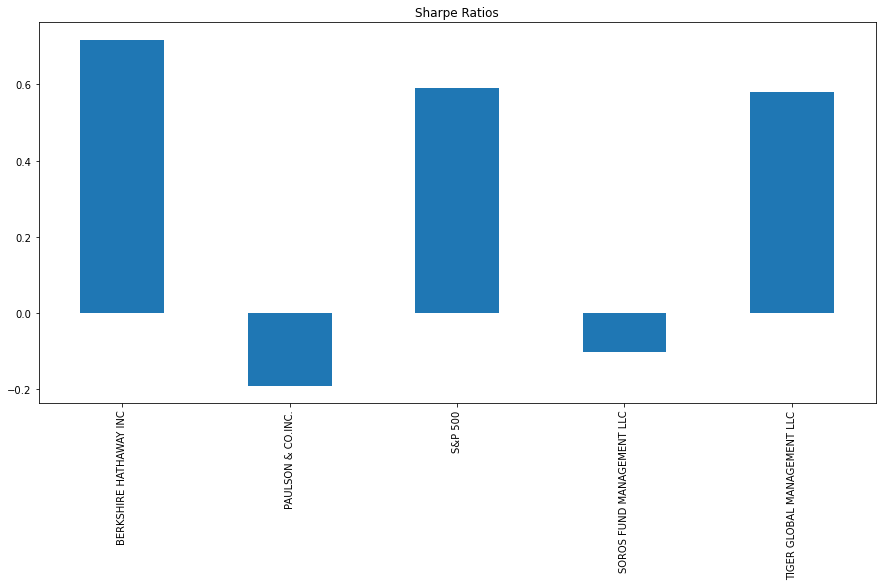

In [58]:
# Visualize the Sharpe ratios as a bar chart
whales_sharpe_ratios.plot.bar(figsize=(15, 7), title="Sharpe Ratios")

**Question** The Berkshire Hathaway Inc. fund offers the best rish-return profile while Paulson & Co. Inc. offers the worst risk-return profile.

---

### Diversify the Portfolio

Evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

In [33]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
market_variance = whales_returns['S&P 500'].rolling(window=60).var()
display(market_variance.tail())


date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [36]:
# Calculate the covariance using a 60-day rolling window 
tiger_covariance = whales_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(whales_returns['S&P 500'])
display(paulson_covariance.tail())


date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [37]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
tiger_rolling_60_beta = tiger_covariance / market_variance
display(tiger_rolling_60_beta.tail())


date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [38]:
# Calculate the average of the 60-day rolling beta
tiger_rolling_60_beta.mean()

0.03093001487238774

<AxesSubplot:title={'center':'Tiger Global - 60-Day Rolling Beta'}, xlabel='Date', ylabel='Beta Value'>

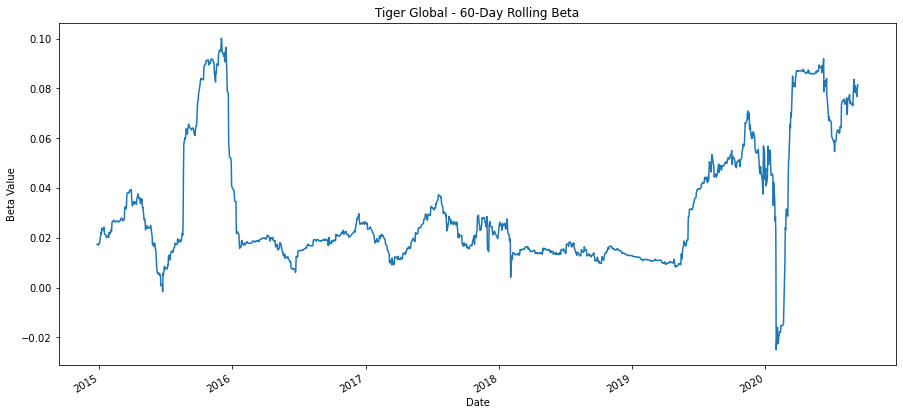

In [39]:
# Plot the rolling beta 
tiger_rolling_60_beta.plot(
    figsize=(15,7), 
    title='Tiger Global - 60-Day Rolling Beta',
    xlabel='Date',
    ylabel='Beta Value'
)

In [40]:
# Calculate the covariance using a 60-day rolling window 
berkshire_covariance = whales_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(whales_returns['S&P 500'])
display(berkshire_covariance.tail())


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [16]:
# 60-day rolling covariance compared to the market (S&P 500)
berkshire_rolling_60_beta = berkshire_covariance / market_variance
display(berkshire_rolling_60_beta.tail())

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [82]:
# Average of the 60-day rolling beta
berkshire_rolling_60_beta.mean()


0.2214986101354593

<AxesSubplot:title={'center':'Berkshire Hathaway - 60-Day Rolling Beta'}, xlabel='Date', ylabel='Beta Value'>

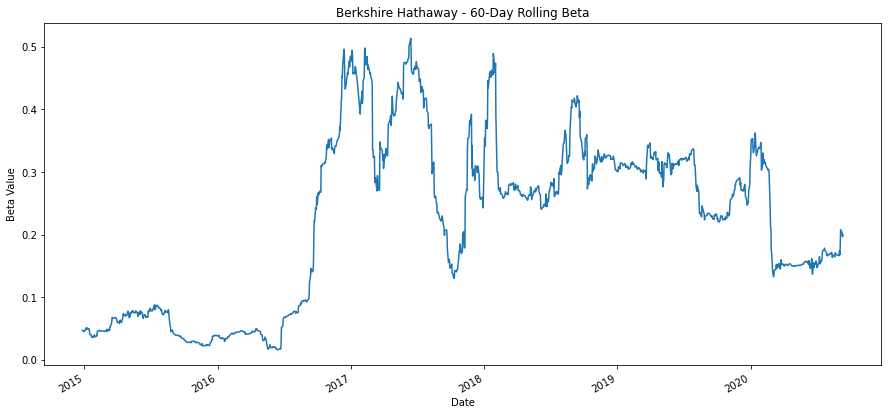

In [17]:
# Plot the rolling beta 
berkshire_rolling_60_beta.plot(
    figsize=(15,7), 
    title='Berkshire Hathaway - 60-Day Rolling Beta',
    xlabel='Date',
    ylabel='Beta Value'
)


**Quantitative Analysis** Berkshire Hathaway is more sensitive to movements in the S&P 500 than Tiger Global Management LLC.


**Quantitative Analysis** I recommend including Tiger Global Management LLC in the firm's suite of funds. Tiger Global is a less volatile investment and less reactive to movement in the S&P 500 yet has an exceptional Risk/Return opportunity.

---